In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import itertools

In [2]:
prjDir = "/home/charles/Projects/QcMtlStreets"
#prjDir = "/home/dhw3172/projects/qcMtlStreets"

In [3]:
print(os.getcwd())
os.chdir(prjDir)
print(os.getcwd())

/home/charles/Projects/QcMtlStreets/Notebooks
/home/charles/Projects/QcMtlStreets


In [4]:
sys.path.append(os.path.join(prjDir, "Python"))   
os.path.isdir(os.path.join(prjDir, "Python"))

True

In [5]:
from OsmnxElev import *

In [6]:
listNeigh=["Saint-Jean-Baptiste", \
           "Saint-Roch" ]#, \
                              #"Vieux-Québec/Cap-Blanc/Colline parlementaire",\
                              #"Montcalm",\
                              #"Saint-Sauveur"]
listNeigh

['Saint-Jean-Baptiste', 'Saint-Roch']

In [7]:
graphQc=loadGraphElevGradesNeighQc()

File exists => reading graph


In [8]:
graphQcUndirected=graphQc.to_undirected()

In [9]:
#getAllListEdgesDirectedMultigraph(graphQc,listNeigh=["Saint-Roch","Saint-Jean-Baptiste"])

In [10]:
qcCentral,listNodes=getSubgraphListNeighOneGraph(graphQc,listNeigh)
listNodes[:3]

[4919093726, 377488351, 377488353]

In [11]:
listFeat=["grade_abs"]

In [12]:
getAllDirectedWeightedEdgesNeighGraph(graphQc, 
                                                        listNeigh,
                                                        listFeat,
                                                       "sum")


In getAllDirectedWeightedEdgesNeighGraph => using the agg function  sum  on the following features:
 grade_abs


pairIdxDirected  count  grade_abs  startIdx  endIdx           startNeigh  \
0          (0, 1)      7     1.0557         0       1  Saint-Jean-Baptiste   
1          (1, 0)      9     1.5454         1       0           Saint-Roch   

              endNeigh  
0           Saint-Roch  
1  Saint-Jean-Baptiste

In [14]:
getAllUndirectedWeightedEdgesNeighGraph(graphQc, 
                                                        listNeigh,
                                                        listFeat,
                                                       "sum")

In getAllDirectedWeightedEdgesNeighGraph => using the agg function  sum  on the following features:
 grade_abs


pairIdxUndirected  count  grade_abs  startIdx  endIdx           startNeigh  \
0            (0, 1)     16     2.6011         0       1  Saint-Jean-Baptiste   

     endNeigh  
0  Saint-Roch

In [15]:
dfListEdgesMultigraph=getAllListEdgesDirectedMultigraph(graphQc,
                                                       listNeigh,
                                                       listFeat)

In [16]:
dfListEdgesMultigraph.head()

startNode           startNeigh     endNode    endNeigh  grade_abs  \
0   164925596  Saint-Jean-Baptiste  3960458872  Saint-Roch     0.0702   
1  4723196405  Saint-Jean-Baptiste   275731864  Saint-Roch     0.0745   
2   165224950  Saint-Jean-Baptiste  5866614604  Saint-Roch     0.0764   
3  4772979548  Saint-Jean-Baptiste  1400596012  Saint-Roch     0.0687   
4  4772979574  Saint-Jean-Baptiste  4772979575  Saint-Roch     0.2027   

   startIdx  endIdx pairIdxDirected pairIdxUndirected  
0         0       1          (0, 1)            (0, 1)  
1         0       1          (0, 1)            (0, 1)  
2         0       1          (0, 1)            (0, 1)  
3         0       1          (0, 1)            (0, 1)  
4         0       1          (0, 1)            (0, 1)

In [20]:
adjMatUndirectedGradeAbs=getAdjMatrixFromEdgeList(dfListEdgesMultigraph,weightCol="grade_abs",aggFun="mean")

in addMissingComb => adding all missing permutations (directed graph)
in removeDupAggEdges, using  mean  as the aggregation function
Matrix already square


In [21]:
adjMatUndirectedGradeAbs

endNeigh             Saint-Jean-Baptiste  Saint-Roch
endNeigh                                            
Saint-Jean-Baptiste                  NaN    0.162569
Saint-Roch                      0.162569         NaN

In [125]:
adjMat1=nx.adjacency_matrix(qcCentral,weight="grade_abs").todense()

In [129]:
np.sum(np.sum(~np.isclose(adjMat1,adjMat1.T)))

1640

In [132]:
np.triu(adjMat1) 

array([[0.    , 0.    , 0.0246, ..., 0.    , 0.0322, 0.    ],
       [0.    , 0.    , 0.0081, ..., 0.    , 0.    , 0.0154],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0257],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

In [135]:
np.tril(adjMat1)

matrix([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.0246, 0.0081, 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.0322, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.0154, 0.    , ..., 0.0257, 0.    , 0.    ]])

In [140]:
 np.matrix(np.tril(adjMat1)) + np.matrix( np.triu(adjMat1) ) 

matrix([[0.    , 0.    , 0.0246, ..., 0.    , 0.0322, 0.    ],
        [0.    , 0.    , 0.0081, ..., 0.    , 0.    , 0.0154],
        [0.0246, 0.0081, 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0257],
        [0.0322, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.0154, 0.    , ..., 0.0257, 0.    , 0.    ]])

In [162]:
np.triu(adjMat1)[0,2] 
max(adjMat1[0,2] ,2)
np.matrix(adjMat1)[0,0]=2

In [158]:
adjMat1.shape

(2445, 2445)

In [166]:
np.empty(shape=(2,3))

array([[0.    , 0.    , 0.0246],
       [0.    , 0.0322, 0.    ]])

In [167]:
mat=np.empty((adjMat1.shape[0],adjMat1.shape[1]))
for a in range(adjMat1.shape[0]):
    for b in range(adjMat1.shape[1]):
        i=adjMat1 [a,b]
        j=adjMat1 [b,a]
        mat[a,b] = max(i,j)

In [43]:
connComp=[i for i in  nx.connected_components(qcCentral.to_undirected()) ]
maxComp=np.argmax([ len(i) for i in connComp])
maxComp

0

In [44]:
listNodes=connComp[maxComp]

In [45]:
qcCentralLargestUndi=nx.induced_subgraph( qcCentral.to_undirected(), listNodes)

In [52]:
adjMatrixCentralGrade=nx.adjacency_matrix(qcCentralLargestUndi,weight="grade_abs")
adjMatrixCentralGrade=adjMatrixCentralGrade.todense()

In [168]:
mat

array([[2.    , 0.    , 0.0246, ..., 0.    , 0.0322, 0.    ],
       [0.    , 0.    , 0.0081, ..., 0.    , 0.    , 0.0154],
       [0.0246, 0.0081, 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0257],
       [0.0322, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.0154, 0.    , ..., 0.0257, 0.    , 0.    ]])

In [47]:
list(nx.get_edge_attributes(qcCentralLargestUndi, "grade_abs").values())[:2]

[0.0322, 0.0246]

In [48]:
nx.is_connected(qcCentralLargestUndi)

True

In [55]:
np.sum(np.sum( ~np.isfinite(adjMatrixCentralGrade)))

0

In [57]:
np.sum( np.sum( ~np.isclose(adjMatrixCentralGrade,adjMatrixCentralGrade.T) ) )

0

In [175]:
mat2=nx.adjacency_matrix(qcCentral.to_undirected(),weight="grade_abs").todense()

In [178]:
np.sum(np.sum(~np.isclose(mat,mat2)))

1

In [211]:
nodeAssignGradeAbs=SpectralClustering(n_clusters=2,affinity="precomputed").fit_predict(adjMatrixCentralGrade)
                   

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [212]:
nodeAssignGradeAbs

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [215]:
scalarMap = cm.ScalarMappable( cmap=cm.Set1 )
uniqueNodes=np.unique(nodeAssignGradeAbs)
uniqueCols=[ scalarMap.to_rgba(i) for i in uniqueNodes]

pd.DataFrame( {"nodeGroup": uniqueNodes,
              "col":uniqueCols})

nodeGroup                                                col
0          0  (0.8941176470588236, 0.10196078431372549, 0.10...
1          1  (0.8941176470588236, 0.10196078431372549, 0.10...

In [74]:
len(edgeAssignGradeAbs)

2420

In [61]:
np.unique(edgeAssignGradeAbs)

array([0, 1], dtype=int32)

In [93]:
dfNodes=pd.DataFrame(edgeAssignGradeAbs).reset_index().groupby(0)["index"].nunique()

In [101]:
dfNodesP=pd.DataFrame(dfNodes).reset_index().rename(columns={0:"nodeGroup",
                                                            "index":"count"})
dfNodesP

nodeGroup  count
0          0   1115
1          1   1305

In [110]:
dfAllNodes=pd.DataFrame(edgeAssignGradeAbs).rename(columns={0:"nodeGroup"})

In [102]:
matSymm=makeSquareMatrixSymmetric(adjMatrixCentral.todense())

In [103]:
np.allclose(matSymm, matSymm.T, rtol=10**-4,atol=10**-4) 

True

In [104]:
dfCol=pd.DataFrame({"col":["red","blue"], 
                   "nodeGroup":[0,1]} )

In [106]:
dfColWithCount=pd.merge( dfCol, dfNodesP, how="left")
dfColWithCount

col  nodeGroup  count
0   red          0   1115
1  blue          1   1305

In [113]:
dfAllNodesWithCol=pd.merge(  dfAllNodes, dfColWithCount, how="left" )
dfAllNodesWithCol.head()

nodeGroup   col  count
0          0   red   1115
1          0   red   1115
2          0   red   1115
3          1  blue   1305
4          1  blue   1305

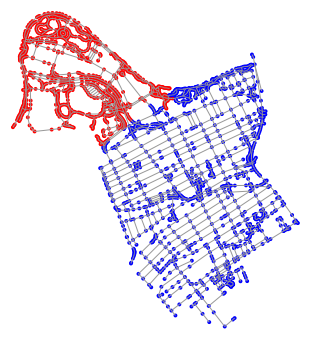

(<Figure size 573.63x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3af37d5e10>)

In [115]:
ox.plot_graph(qcCentralLargestUndi,
              node_color=dfAllNodesWithCol.col)

In [182]:
edgeColGrade=ox.get_edge_colors_by_attr(qcCentralLargestUndi,"grade_abs",cmap="plasma")

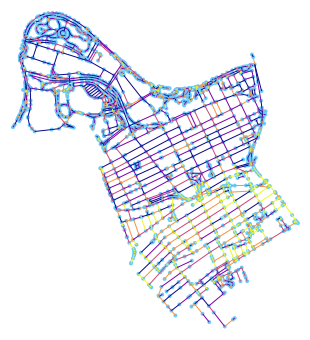

(<Figure size 573.63x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3aed9db748>)

In [121]:
ox.plot_graph(qcCentralLargestUndi,
              edge_color=edgeColGrade)

In [179]:
adjMatrixCentral=nx.adjacency_matrix(qcCentralLargestUndi)


In [195]:
nodeSpect=SpectralClustering(n_clusters=2, affinity="precomputed" ).fit_predict(adjMatrixCentral)
dfAllNodesp=pd.DataFrame(nodeSpect).reset_index().rename(columns={0:"nodeGroup"})
dfAllNodesp.head()

index  nodeGroup
0      0          0
1      1          0
2      2          0
3      3          1
4      4          1

In [204]:
dfColWithCount.head()

col  nodeGroup  count
0   red          0   1115
1  blue          1   1305

In [205]:
dfAllNodesp.groupby("nodeGroup").nunique()

index  nodeGroup
nodeGroup                  
0           1095          1
1           1325          1

In [198]:
dfAllNodesWithColp=pd.merge(  dfAllNodesp, dfColWithCount, how="left" )

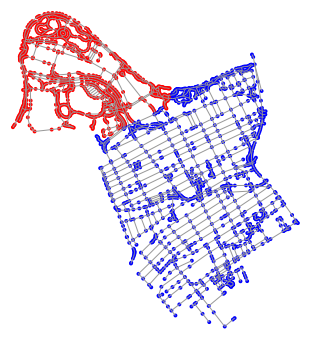

(<Figure size 573.63x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3ad6922f60>)

In [199]:
ox.plot_graph(qcCentralLargestUndi,
              node_color=dfAllNodesWithColp.col)